In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#split
x=iris.drop('species',axis=1)
y=iris['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
#build the DT
tree=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)
#fit
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)

In [58]:
#predict
y_pred=tree.predict(x_test)

#evaluation
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [59]:
#encode the species column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['species']=le.fit_transform(iris['species'])

In [60]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


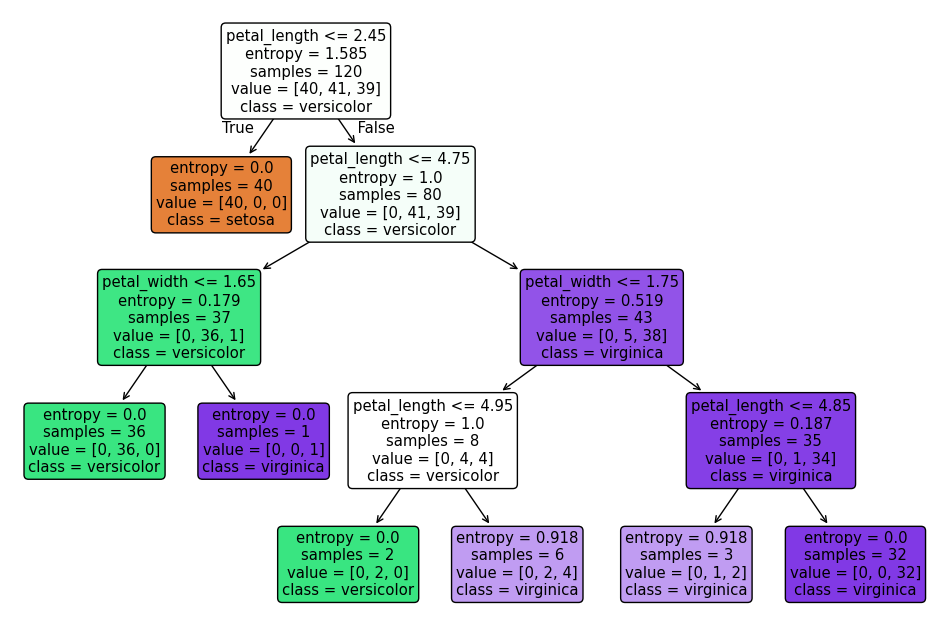

In [61]:
# Visualize with plot_tree() (recommended for quick visualization)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    filled=True,           # color nodes by class
    feature_names=x.columns,
    class_names=y.unique().tolist(), # Use unique string labels from original y
    rounded=True           # rounded corners for readability
)
plt.show()